# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url)
apple.head()

Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date')      # 这里如果 parameter pass in 的是 string（column name），就会 drop，因为 drop = True
# apple = apple.set_index(apple.Date)     # 但是如果这样做，就不会自动 drop，需要手动 pass drop=True

apple.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 7.  Is there any duplicate dates?

In [7]:
# 答案：
apple.index.is_unique
# All dates are unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple = apple.sort_index()
apple.head()

Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41

### Step 9. Get the last business day of each month

In [9]:
# 自己的解法：
apple[apple.index.is_month_end]

Open    High     Low   Close     Volume  Adj Close
Date                                                            
1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53
1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
1981-06-30   26.13   26.13   26.00   26.00    8976800       0.41
1981-07-31   25.00   25.12   25.00   25.00    2738400       0.39
...            ...     ...     ...     ...        ...        ...
2014-01-31  495.18  501.53  493.55  500.60  116199300      70.69
2014-02-28  529.08  532.75  522.12  526.24   92992200      74.76
2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93

[283 rows x 6 columns]

In [10]:
# 答案：
apple.resample('BM').mean()

Open        High         Low       Close        Volume  \
Date                                                                       
1980-12-31   30.481538   30.567692   30.443077   30.443077  2.586252e+07   
1981-01-30   31.754762   31.826667   31.654762   31.654762  7.249867e+06   
1981-02-27   26.480000   26.572105   26.407895   26.407895  4.231832e+06   
1981-03-31   24.937727   25.016818   24.836364   24.836364  7.962691e+06   
1981-04-30   27.286667   27.368095   27.227143   27.227143  6.392000e+06   
...                ...         ...         ...         ...           ...   
2014-03-31  533.593333  536.453810  530.070952  533.214286  5.954403e+07   
2014-04-30  540.081905  544.349048  536.262381  541.074286  7.660787e+07   
2014-05-30  601.301905  606.372857  598.332857  603.195714  6.828177e+07   
2014-06-30  222.360000  224.084286  220.735714  222.658095  5.745506e+07   
2014-07-31   94.294000   95.004000   93.488000   94.470000  4.218366e+07   

            Adj Close  
Date                   
1980-12-31   0.473077  
1981-01-30   0.493810  
1981-02-27   0.411053  
1981-03-31   0.387727  
1981-04-30   0.423333  
...               ...  
2014-03-31  75.750000  
2014-04-30  76.867143  
2014-05-30  86.058571  
2014-06-30  91.885714  
2014-07-31  94.470000  

[404 rows x 6 columns]

### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
# 自己的解法
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

In [12]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [13]:
# 自己的解法：
(apple.index[-1] - apple.index[0]) / np.timedelta64(1, 'M')

402.8337337522331

In [14]:
# 答案：
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<AxesSubplot:xlabel='Date'>

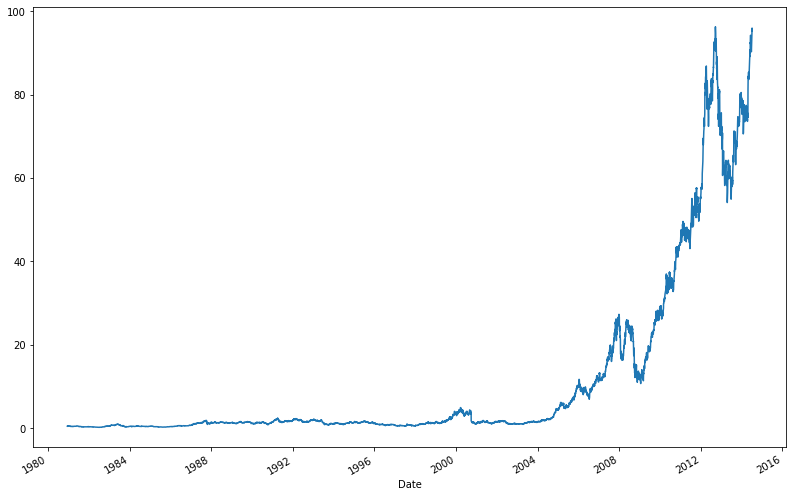

In [15]:
# 自己的解法：
apple['Adj Close'].plot(figsize=(13.5, 9))

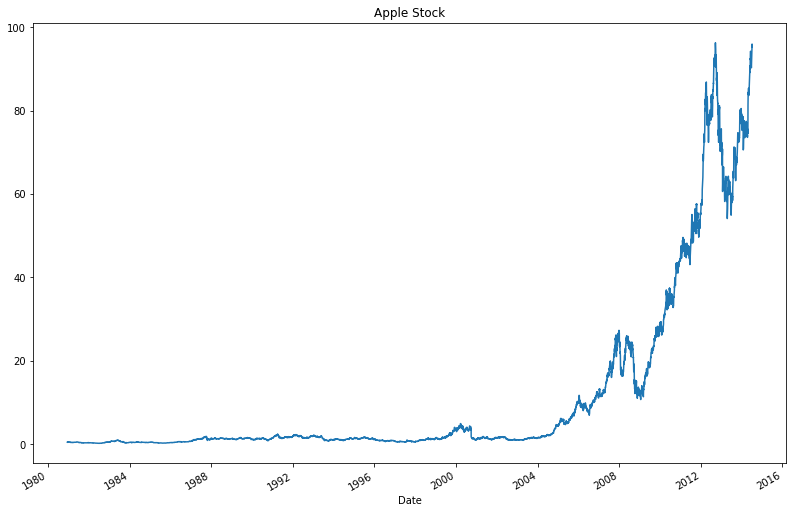

In [16]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = 'Apple Stock')

# change the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5,9)

自己试：

<Figure size 972x648 with 0 Axes>

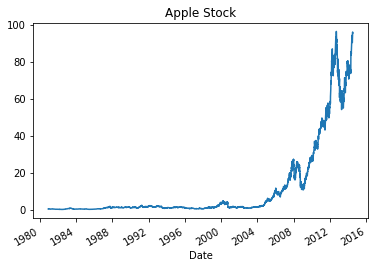

<Figure size 972x648 with 0 Axes>

In [17]:
apple['Adj Close'].plot(title = 'Apple Stock')
plt.figure(figsize=(13.5, 9))                  # 想改变 size，这行需要放在前面

<AxesSubplot:title={'center':'Apple Stock'}, xlabel='Date'>

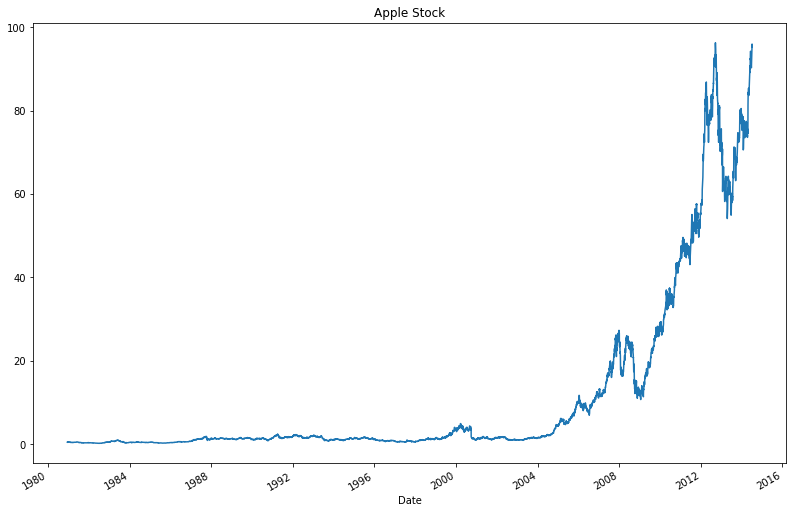

In [18]:
plt.figure(figsize=(13.5, 9))  
apple['Adj Close'].plot(title = 'Apple Stock')

### BONUS: Create your own question and answer it.

自己加：pandas 的 dataframe 也可以像 Excel 一样做 conditional formating

In [21]:
apple.style.background_gradient(cmap='Greens')